<center>
    <h1>Machine Learning Prerequisite Test</h1>
</center>

<h3> Question 1 : </h3>
<p> How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.</p>

<h4>Answer :</h4>
<ol>
    <li>In matrix multiplication between an \( (n, k) \) matrix and a \( (k, m) \) matrix, each element in the resulting matrix requires one multiplication and one addition. Let's break down the process:</li>
    <li>For a specific element \( C[i, j] \) in the resulting matrix:</li>
    <ul>
        <li>\( C[i, j] = \sum_{p=1}^{k} A[i, p] \cdot B[p, j] \)</li>
        <li>Here, for each element \( C[i, j] \), you perform \( k \) multiplications and \( k-1 \) additions.</li>
    </ul>
    <li>Now, considering all elements in the resulting matrix:</li>
    <ul>
        <li>Multiplications: \( n \times m \times k \) (for each element)</li>
        <li>Additions: \( n \times m \times (k-1) \) (for each element)</li>
    </ul>
</ol>


<h3>Question 2 :</h3>
<p>Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?</p>

In [9]:
import numpy as np
import time

# Function to multiply matrices using lists of lists
def multiply_matrices_lists(A, B):
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    
    result_matrix = []
    for i in range(n):
        row = []
        for j in range(m):
            row.append(0)
        result_matrix.append(row)
 
    for i in range(n):
        for j in range(m):
            for p in range(k):
                result_matrix[i][j] += A[i][p]*B[p][j]
    return result_matrix


# Function to multiply matrices using NumPy
def multiply_matrices_numpy(A, B):
    return np.dot(A, B)

# Example matrices
A = np.random.rand(100, 50)
B = np.random.rand(50, 200)

# Timing for list of lists
start_time = time.time()
result_lists = multiply_matrices_lists(A.tolist(), B.tolist())
time_lists = time.time() - start_time

# Timing for NumPy
start_time = time.time()
result_numpy = multiply_matrices_numpy(A, B)
time_numpy = time.time() - start_time

# Compare results and timings
assert np.allclose(result_lists, result_numpy), "Results do not match!"

print(f"Time using lists of lists: {time_lists:.6f} seconds")
print(f"Time using NumPy: {time_numpy:.6f} seconds")


Time using lists of lists: 0.086841 seconds
Time using NumPy: 0.000190 seconds


The multiplication done using numpy is much faster than the multiplication using list of lists is because of the optimized C implementation in numpy.

 <h3>Question 3 :</h3>
<p>Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?</p>

 
<h3>Question 4 :</h3>
<p>What is the gradient of the following function with respect to \(x\) and \(y\)?</p>
<p style="text-align: margin-right: 5px ;">\[ x^2y + y^3\sin(x) \]</p>


<h4>Answer:</h4>
<p>The gradient of the function \(f(x, y) = x^2y + (y^3)\sin(x)\) with respect to \(x\) and \(y\) is:</p>
<p>\[\frac{\partial f}{\partial x} = 2xy + (y^3)\cos(x)\]</p>
<p>\[\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)\]</p>


 <h3>Question 5 :</h3>
<p>Use <b>JAX</b> to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y</p>

 <h3>Question 6 :</h3>
<p>Use <b>sympy</b> to confirm that you obtain the same gradient analytically.</p>

 <h3>Question 7 :</h3>
<ol>
    <li> Create a Python nested dictionary to represent hierarchical information. We want to store a record of students and their marks. Something like:
        <ol>
            <li>2022
                <ol>
                    <li>Branch 1
                        <ol>
                            <li>Roll Number: 1, Name: N, Marks:
                                <ol>
                                    <li>Maths: 100, English: 70 …</li>
                                </ol>
                            </li>
                        </ol>
                    </li>
                    <li>Branch 2</li>
                </ol>
            </li>
            <li>2023
                <ol>
                    <li>Branch 1</li>
                    <li>Branch 2</li>
                </ol>
            </li>
            <li>2024
                <ol>
                    <li>Branch 1</li>
                    <li>Branch 2</li>
                </ol>
            </li>
            <li>2025
                <ol>
                    <li>Branch 1</li>
                    <li>Branch 2</li>
                </ol>
            </li>
        </ol>
    </li>
</ol>


In [8]:
students_records = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70,
                
            }
        },
        'Branch 2': {
        }
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}


 <h3>Question 8 :</h3>
<p>Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.</p>

In [7]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students=None):
        self.name = name
        self.students = students if students is not None else []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year, branches=None):
        self.year = year
        self.branches = branches if branches is not None else []

    def add_branch(self, branch):
        self.branches.append(branch)


student1 = Student(1, 'N', {'Maths': 100, 'English': 70})
branch1 = Branch('Branch 1', [student1])
branch2 = Branch('Branch 2')
year2022 = Year(2022, [branch1, branch2])

branch3 = Branch('Branch 1')
branch4 = Branch('Branch 2')
year2023 = Year(2023, [branch3, branch4])

branch5 = Branch('Branch 1')
branch6 = Branch('Branch 2')
year2024 = Year(2024, [branch5, branch6])

branch7 = Branch('Branch 1')
branch8 = Branch('Branch 2')
year2025 = Year(2025, [branch7, branch8])




 <h3>Question 9 :</h3>
<p>Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.</p>
<ol>
    <li>\(y = x\)</li>
    <li>\(y = x^2\)</li>
    <li>\(y = \frac{x^3}{100}\)</li>
    <li>\(y = \sin(x)\)</li>
    <li>\(y = \frac{\sin(x)}{x}\)</li>
    <li>\(y = \log(x)\)</li>
    <li>\(y = e^x\)</li>
</ol>



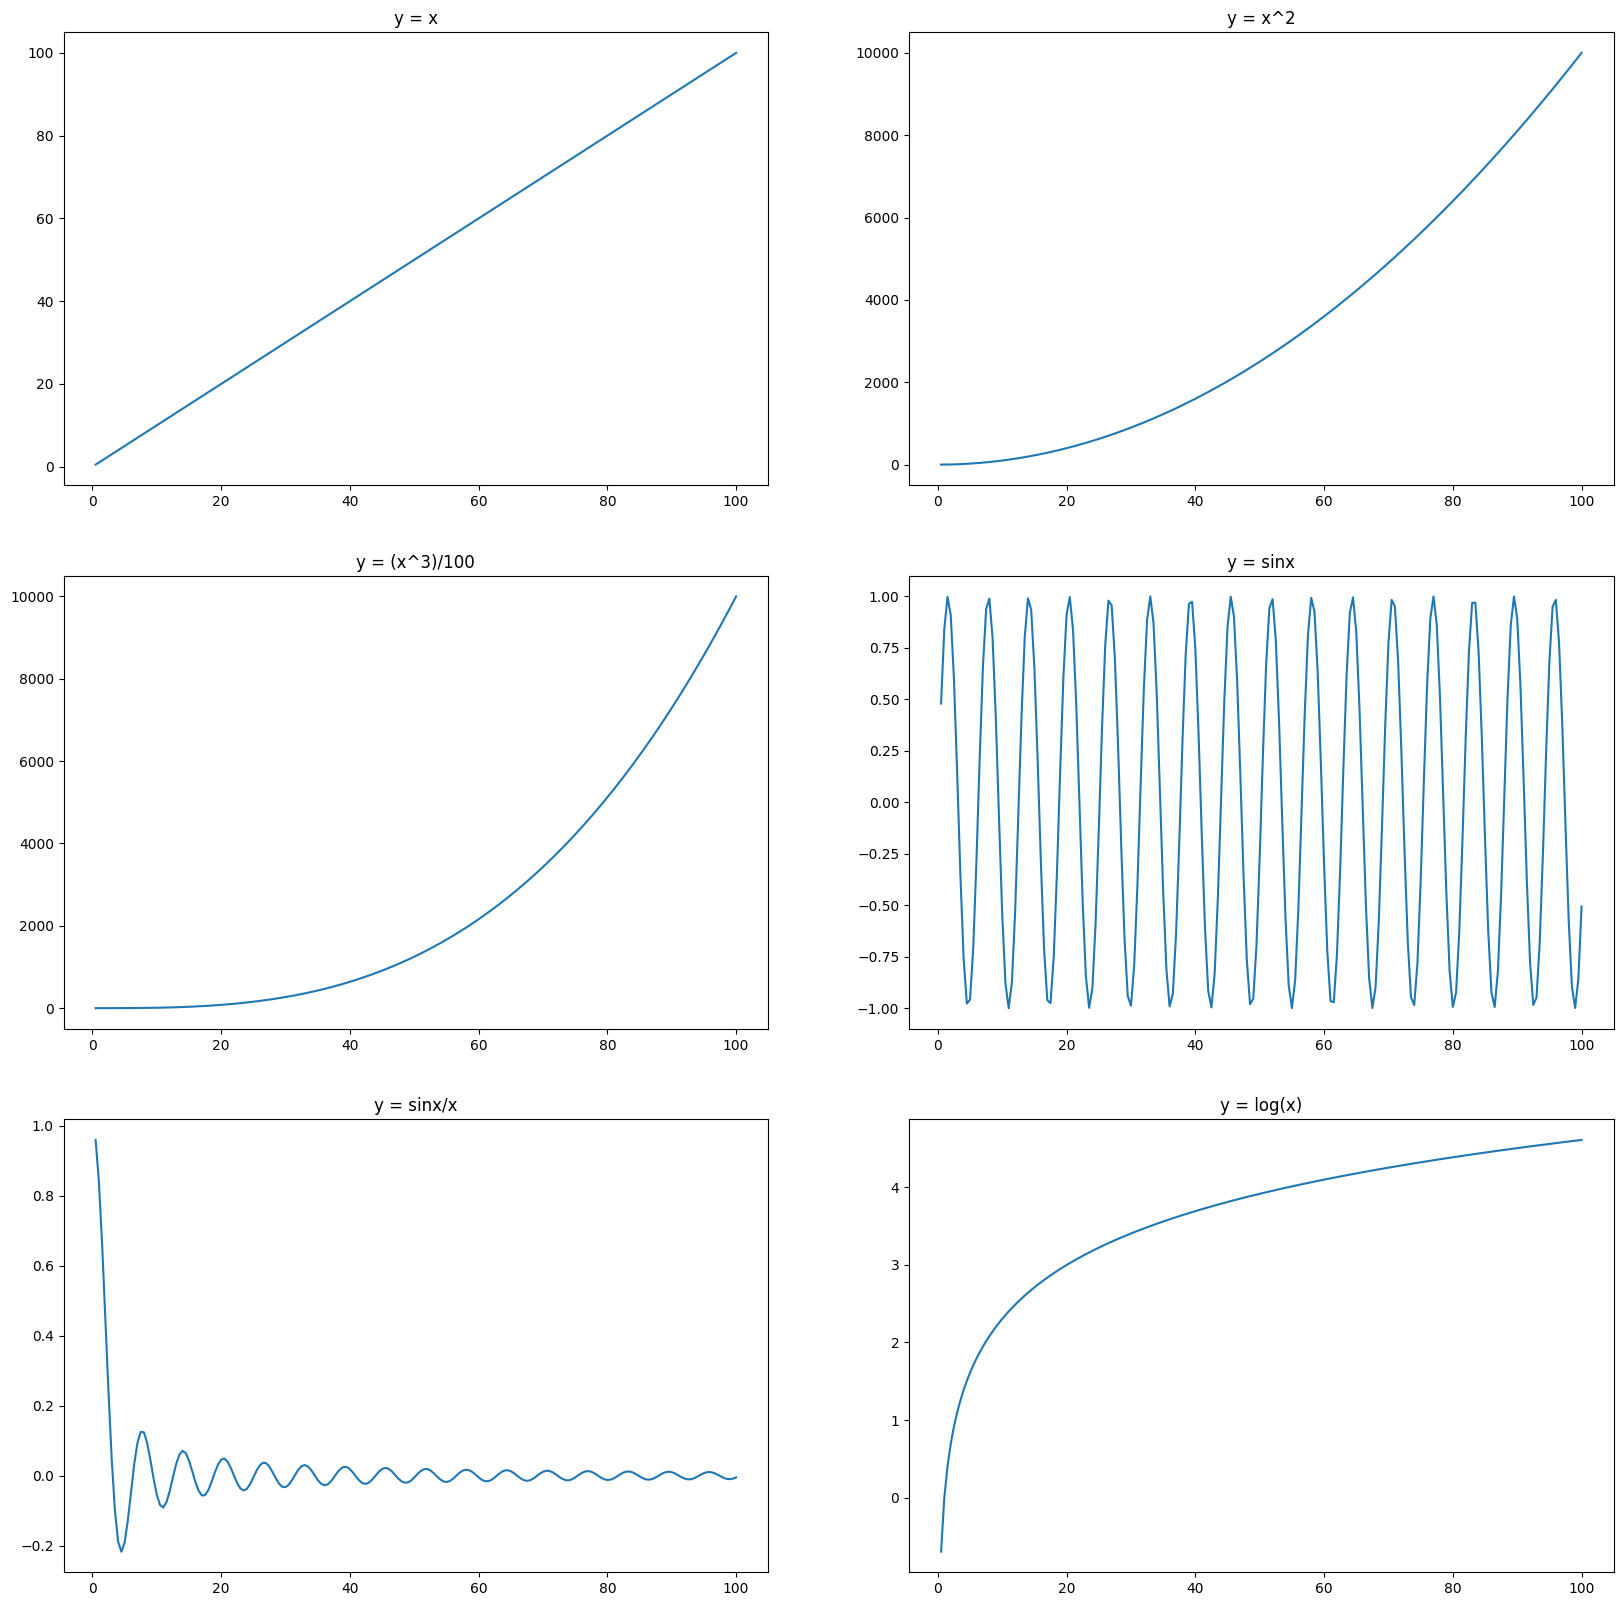

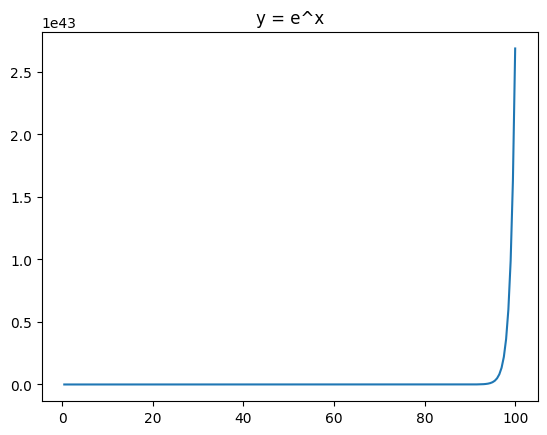

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

figure, axis = plt.subplots(3,2, figsize = (20,20))
x = np.arange(0.5, 100.5, 0.5)
y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = (np.sin(x))/x
y6 = np.log(x)
y7 = np.exp(x)


axis[0,0].plot(x,y1)
axis[0,0].set_title("y = x")

axis[0,1].plot(x,y2)
axis[0,1].set_title("y = x^2")

axis[1,0].plot(x,y3)
axis[1,0].set_title("y = (x^3)/100")

axis[1,1].plot(x,y4)
axis[1,1].set_title("y = sinx")

axis[2,0].plot(x,y5)
axis[2,0].set_title("y = sinx/x")

axis[2,1].plot(x,y6)
axis[2,1].set_title("y = log(x)")

# axis[3,0].plot(x,y7)
# axis[3,0].set_title("y = e^x")

# axis[3,1].axis('off')

plt.show()

plt.plot(x,y7)
plt.title("y = e^x")
plt.show()

 <h3>Question 10 :</h3>
<p>Using numpy generate a matrix of size <b>20X5</b> containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.</p>

In [3]:
import numpy as np
import pandas as pd

matrix_data = np.random.uniform(1, 2, size=(20, 5))
# print(matrix_data)

df = pd.DataFrame(matrix_data, columns=["a", "b", "c", "d", "e"])

column_with_highest_std = df.std().idxmax()

row_with_lowest_mean = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", column_with_highest_std)
print("Row with the lowest mean:", row_with_lowest_mean)


DataFrame:
           a         b         c         d         e
0   1.234263  1.784573  1.041429  1.656138  1.312814
1   1.463550  1.063817  1.317131  1.192073  1.145760
2   1.973505  1.683472  1.973200  1.590890  1.859377
3   1.105786  1.504934  1.863560  1.578938  1.882494
4   1.767108  1.710217  1.203894  1.447816  1.061170
5   1.375796  1.828615  1.208537  1.653771  1.107255
6   1.955198  1.938828  1.843119  1.826937  1.501470
7   1.496308  1.536099  1.703419  1.440444  1.000188
8   1.431275  1.275280  1.792903  1.120425  1.324030
9   1.776552  1.753841  1.037671  1.491535  1.645632
10  1.201351  1.727701  1.177180  1.297055  1.799572
11  1.591174  1.091367  1.367415  1.739813  1.377759
12  1.970494  1.971537  1.797964  1.906148  1.765820
13  1.102842  1.438940  1.867296  1.384150  1.605635
14  1.218764  1.215644  1.182664  1.190650  1.156279
15  1.775914  1.468800  1.145817  1.584097  1.838068
16  1.569087  1.766417  1.814677  1.791238  1.443341
17  1.279846  1.197170  1.806440  1

 <h3>Question 11 :</h3>
<p>Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.</p>

In [4]:
# Run the previous question before running this code.
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_rows_LT8 = len(df[df['g'] == 'LT8'])


std_dev_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Updated DataFrame:")
print(df)
print("\nNumber of rows where 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of 'f' for 'LT8':", std_dev_LT8)
print("Standard deviation of 'f' for 'GT8':", std_dev_GT8)


Updated DataFrame:
           a         b         c         d         e         f    g
0   1.234263  1.784573  1.041429  1.656138  1.312814  7.029217  LT8
1   1.463550  1.063817  1.317131  1.192073  1.145760  6.182330  LT8
2   1.973505  1.683472  1.973200  1.590890  1.859377  9.080444  GT8
3   1.105786  1.504934  1.863560  1.578938  1.882494  7.935712  LT8
4   1.767108  1.710217  1.203894  1.447816  1.061170  7.190205  LT8
5   1.375796  1.828615  1.208537  1.653771  1.107255  7.173974  LT8
6   1.955198  1.938828  1.843119  1.826937  1.501470  9.065551  GT8
7   1.496308  1.536099  1.703419  1.440444  1.000188  7.176458  LT8
8   1.431275  1.275280  1.792903  1.120425  1.324030  6.943912  LT8
9   1.776552  1.753841  1.037671  1.491535  1.645632  7.705232  LT8
10  1.201351  1.727701  1.177180  1.297055  1.799572  7.202859  LT8
11  1.591174  1.091367  1.367415  1.739813  1.377759  7.167528  LT8
12  1.970494  1.971537  1.797964  1.906148  1.765820  9.411963  GT8
13  1.102842  1.438940  1.867

 <h3>Question 12 :</h3>
<p>Write a small piece of code to explain broadcasting in numpy.</p>

In [5]:
import numpy as np

# Create a 2x3 array
array_a = np.array([[1, 2, 3],
                    [4, 5, 6]])

array_b = np.array([10, 20, 30])

array_c = np.array([[10,20,30],
                    [10,20,30]])

result = array_a + array_b

print("Array A:")

print(array_a,"\n")

print("Array B:", array_b)

print("\nResult after broadcasting:")
print(result)



Array A:
[[1 2 3]
 [4 5 6]] 

Array B: [10 20 30]

Result after broadcasting:
[[11 22 33]
 [14 25 36]]


<h6>Explanation: </h6>
<ol>
    <li><strong>array_a</strong> is a <strong>2x3</strong> matrix.</li>
    <li><strong>array_b</strong> is a <strong>1x3</strong> matrix.</li>
    <li>When we perform the addition (<code>array_a + array_b</code>), NumPy automatically broadcasts the smaller array (<strong>array_b</strong>) to the shape of the larger array (<strong>array_a</strong>).</li>
    <li>Broadcasting rules allow the smaller array to be conceptually "replicated" along its missing dimensions.</li>
    <li>The addition is then performed element-wise, resulting in a <strong>2x3</strong> matrix where each element is the sum of the corresponding elements in <strong>array_a</strong> and the "broadcasted" <strong>array_b</strong>.</li>
</ol>


 <h3>Question 13 :</h3>
<p>Write a function to compute the <b>argmin</b> of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the <b>np.argmin</b> function to verify your solution.</p>

In [6]:
import numpy as np

def argmin(A):
    a = 0
    
    for i in range(1,len(A)):
        if A[a] > A[i]:
            a = i
            
    min_index = a
    return min_index


A = np.random.randint(10, size = 20)

print("Array:", A)
print("Index from function :", argmin(A))

print( f"verified index = {np.argmin(A)}")

Array: [8 4 3 8 2 3 6 8 0 0 1 6 9 6 6 9 7 0 6 0]
Index from function : 8
verified index = 8
